### 수정로그

2025/7/14 전체 파라미터 수를 50,000으로 제한

# 제1회 퀀텀AI 경진대회 베이스라인


이 안내 노트북에서는 양자 컴퓨팅 프레임 워크에 대한 개략적인 소개와 QML의 구현 방법을 알아 봅니다.


다양한 QML framework가 있고 기존 ML framework들과 잘 통합되어 있습니다.
일반적으로는 다음 2 개를 많이 사용합니다.

1. Pennylane: 캐나다 Xanadu에서 만든 양자 컴퓨팅 Framework입니다. 다른 프로젝트들에 비해 머신러닝에 친화적인 인터페이스와 요소를 제공합니다.
2. Qiskit: IBM에서 만든 양자컴퓨팅 Framework입니다. 좀 더 물리적인 실험과 및 대규모 HPC 연산을 포함하는 통합적인 Framework를 제공하고 있습니다.

여기서는 QML 구현을 위해 Pennylane을 사용해 볼 것입니다.

Pennylane은 PyPI에 등록되어 있습니다. 현재 최신 버전은 0.4.x입니다.
다음 명령어로 Python 환경에 `pennylane`을 설치하세요.

Pennylane에 대한 Tutorial과 자세한 사항들은 [Pennylane codebook](https://pennylane.ai/codebook)과 [Demos](https://pennylane.ai/search/?contentType=DEMO&categories=how-to&sort=publication_date) 를 참고하세요.

In [7]:
!pip install pennylane
!pip install matplotlib

## 양자 회로 설계하기

In [1]:
import pennylane as qml # 일반적으로 qml이란 이름으로 가져옵니다. Quantum Machine Learning의 약자입니다.
import numpy as np

dev = qml.device("default.qubit", wires=3) # device를 정의합니다.

@qml.qnode(dev)
def circuit():
    qml.H(0)
    qml.S(0)
    qml.H(1)
    qml.H(2)
    return qml.probs()

Matplotlib is building the font cache; this may take a moment.


## 양자 회로 그리기

In [9]:
print(qml.draw(circuit)())

0: ──H──S─┤  Probs
1: ──H────┤  Probs
2: ──H────┤  Probs


(<Figure size 500x400 with 1 Axes>, <Axes: >)

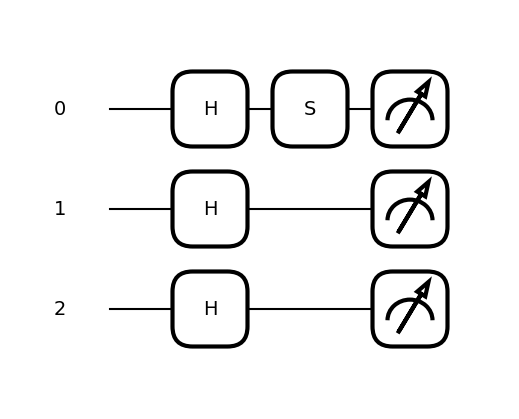

In [2]:
qml.draw_mpl(circuit)()

|양자 회로| ML|
|:--:|:--:|
|Quantum Circuit| Layer, ML Module|
|Backend | device(CPU, CUDA, ...)|

## Backend

Backend는 실제 양자 회로를 구동하는 시뮬레이터, 혹은 양자 컴퓨터입니다. 한 개의 회로를 어느 기기에서 돌릴 지 미리 선언을 해주어야 합니다.


**Backend 선택하기**

다양한 Backend를 양자 회로를 돌리는 데 사용할 수 있습니다. Pennylaned의 `default.qubit`, `lightning.qubit`등 뿐만 아니라, Qiskit, IQM 등 실제 양자 컴퓨터의 Backend interface를 가져와 사용할 수도 있습니다.
그러나, QML을 구현하고 시험해 볼 때는 `default.qubit`이 권장됩니다. 다른 ML 프레임워크와의 결합도 간편할 뿐더러 가장 빠른 differentiation 방법을 제공합니다.

Backend 선택과 개별 device에 대한 정보는 Pennylane의 공식 문서: [Quantum Devices](https://pennylane.ai/devices)를 참고하세요.

In [32]:
NUMBER_OF_WIRES =20
dev = qml.device("default.qubit", wires=NUMBER_OF_WIRES, shots=3000)

In [33]:
# qml.device 함수의 도움말 확인
help(qml.device)

Help on function device in module pennylane.devices.device_constructor:

device(name, *args, **kwargs)
    Load a device and return the instance.

    This function is used to load a particular quantum device,
    which can then be used to construct QNodes.

    PennyLane comes with support for the following devices:

    * :mod:`'default.qubit' <pennylane.devices.default_qubit>`: a simple
      state simulator of qubit-based quantum circuit architectures.

    * :mod:`'default.mixed' <pennylane.devices.default_mixed>`: a mixed-state
      simulator of qubit-based quantum circuit architectures.

    * ``'lightning.qubit'``: a more performant state simulator of qubit-based
      quantum circuit architectures written in C++.

    * :mod:`'default.qutrit' <pennylane.devices.default_qutrit>`: a simple
      state simulator of qutrit-based quantum circuit architectures.

    * :mod:`'default.qutrit.mixed' <pennylane.devices.default_qutrit_mixed>`: a
      mixed-state simulator of qutrit-bas

In [34]:
# qml.device의 docstring 확인 (더 간단한 방법)
print(qml.device.__doc__[:500])  # 처음 500자만 출력

Load a device and return the instance.

This function is used to load a particular quantum device,
which can then be used to construct QNodes.

PennyLane comes with support for the following devices:

* :mod:`'default.qubit' <pennylane.devices.default_qubit>`: a simple
  state simulator of qubit-based quantum circuit architectures.

* :mod:`'default.mixed' <pennylane.devices.default_mixed>`: a mixed-state
  simulator of qubit-based quantum circuit architectures.

* ``'lightning.qubit'``: a more 


In [37]:
# 생성된 디바이스의 속성 확인
print("디바이스 이름:", dev.name)
print("큐빗 수:", dev.wires)
print("샷 수:", dev.shots)


디바이스 이름: default.qubit
큐빗 수: Wires([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
샷 수: Shots(total=3000)


In [38]:
# 사용 가능한 모든 디바이스 목록 확인
print("사용 가능한 디바이스들:")
for device_name in qml.devices:
    print(f"- {device_name}")

사용 가능한 디바이스들:


TypeError: 'module' object is not iterable

## 측정하기

- `qml.probs`: 개별 state들의 측정 확률 벡터입니다. $N$ qubit에 대해 $2^N$ 크기를 가집니다.
- `qml.expval`: Pennylane의 Observable들을 측정합니다. 기초적으로 `qml.PauliZ(i), qml.PauliX(i), qml.PauliY(i)`가 있으며 이들을 조합 하거나/여러개의 Observable을 측정할 수 있습니다.

In [4]:
dev_3 = qml.device("default.qubit", wires=3)

@qml.qnode(dev_3)
def circuit1():
    qml.H(0)
    qml.H(1)
    return qml.expval(qml.PauliX(0))
@qml.qnode(dev_3)
def circuit2():
    qml.H(0)
    qml.H(1)
    return qml.probs()
@qml.qnode(dev_3)
def circuit3():
    qml.H(0)
    qml.H(1)
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]


In [5]:
circuit1()

np.float64(0.9999999999999996)

In [6]:
circuit2()

array([0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  ])

In [7]:
circuit3()

[np.float64(0.0), np.float64(0.0), np.float64(0.9999999999999996)]

In [8]:
obs = qml.PauliZ(0) @ qml.PauliX(1)
obs

Z(0) @ X(1)

In [9]:
@qml.qnode(dev_3)
def circuit4():
    qml.H(0)
    qml.H(1)
    qml.H(2)
    return qml.expval(obs)

In [39]:
circuit4()

/Users/donghun2/workspace/Quantum/.venv/lib/python3.13/site-packages/pennylane/ops/op_math/composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


np.float64(0.0)

## 양자 회로의 설계

In [40]:
from pennylane import numpy as np_p

In [42]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def single_qubit_circuit(theta, input_value):
    qml.RX(theta, wires=0)
    qml.RY(input_value, wires=0)
    return qml.expval(qml.PauliZ(0))


In [43]:
single_qubit_circuit(0.1, 0.2) # Customized numpy result

np.float64(0.9751703272018161)

In [44]:
#Batched data
theta = 0.032
theta_b = np_p.array([0.2, 0.3, 0.5])
input_value_b = np_p.array([3.2, 1.2, 0.1])


In [15]:
single_qubit_circuit(theta_b, input_value_b) # Parameter가 모두 Batched parameter

tensor([-0.97839534,  0.34617358,  0.8731983 ], requires_grad=True)

In [16]:
single_qubit_circuit(theta, input_value_b) # Single, batched parameter 조합

tensor([-0.99778369,  0.36217224,  0.99449477], requires_grad=True)

#### Pennylane Optimizer

In [17]:
opt = qml.GradientDescentOptimizer(stepsize=0.01)
max_iterations = 500
conv_tol = 1e-06
param = np_p.random.rand(1, requires_grad=True)

his_param = []
his_energy = []
for i in range(max_iterations):
    param, prev_energy = opt.step_and_cost(lambda x: single_qubit_circuit(x, input_value_b[0]), param)
    his_param.append(param)
    his_energy.append(prev_energy)
    energy = single_qubit_circuit(param, input_value_b[0])
    conv = np_p.abs(prev_energy - energy)
    if conv <= conv_tol:
        break


In [18]:
import matplotlib.pyplot as plt

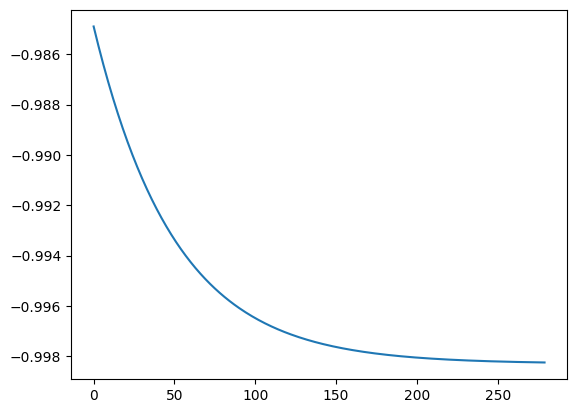

In [19]:
plt.plot(his_energy)

### Torch integration

In [21]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 46.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [torch]32m4/5 [torch]ck]


In [22]:
import torch
from torch.optim import Adam
from torch.nn.parameter import Parameter
from torch.nn import NLLLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
torch_theta = torch.rand(4)
torch_phi = torch.rand(4)
single_qubit_circuit(torch_theta, torch_phi) # Torch tensor의 경우 자동으로 tensor array로 변환

tensor([0.8034, 0.7883, 0.4455, 0.7314], dtype=torch.float64)

In [24]:
parameter = Parameter(torch.tensor( torch.rand(1).item(), requires_grad = True))
parameter

Parameter containing:
tensor(0.9807, requires_grad=True)

In [25]:
optim = Adam([parameter], lr= 0.001)

In [26]:
input_data = torch.rand(1)
history_e  =[]
for i in range(1000):
    optim.zero_grad()
    result = single_qubit_circuit(input_data, parameter)+1
    loss = (result)
    loss.backward()
    history_e.append(result.item())
    optim.step()

In [27]:
import matplotlib.pyplot as plt

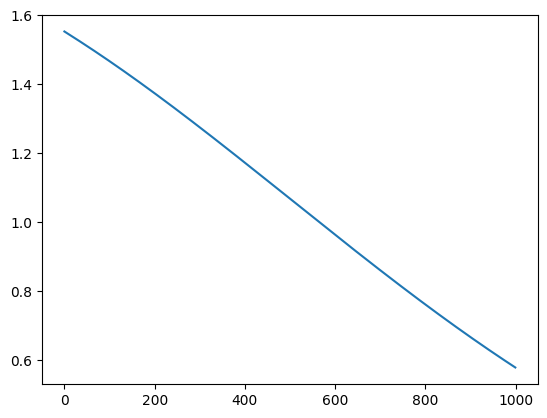

In [28]:
plt.plot(history_e)

# 분류 모델 만들기

## 0-1 binary classfiers

### Fashion MINIST dataset

In [ ]:
import torch
from torch.utils.data import Subset
from torch.utils.data import DataLoader
import torchvision

In [ ]:
transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,), (0.5,))
        ])

train_ds = torchvision.datasets.FashionMNIST(
    "./", train=True, download=True,
    transform=transform)

test_ds = torchvision.datasets.FashionMNIST(
    "./", train=False, download=True,
    transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.4MB/s]


In [ ]:
train_mask = (train_ds.targets == 0) | (train_ds.targets == 6)
train_idx = torch.where(train_mask)[0]
train_ds.targets[train_ds.targets == 6] = 1

binary_train_ds = Subset(train_ds, train_idx)

In [ ]:
train_loader = DataLoader(binary_train_ds, batch_size = 1, shuffle =True)

In [ ]:
from matplotlib import pyplot as plt

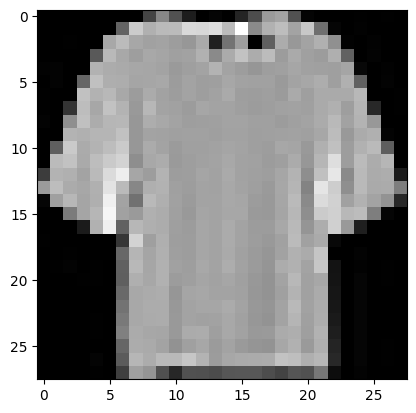

In [ ]:
plt.imshow(binary_train_ds[20][0][0], cmap="grey")

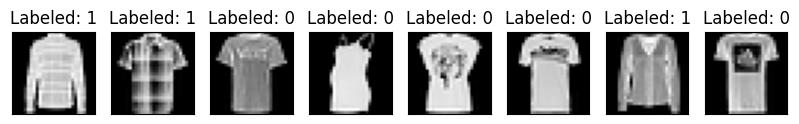

In [ ]:
n_samples_show = 8

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

In [ ]:
# PyTorch 모델을 정의하기 위한 기본 클래스들을 가져옵니다.
from torch.nn import Module
import torch.nn.functional as F
from torch.nn import Conv2d, Dropout2d, Linear
from torch import cat

In [ ]:
# PyTorch의 기본 데이터 타입을 float64로 설정합니다.
torch.set_default_dtype(torch.float64)

# CNN과 QNN을 결합한 하이브리드 이진 분류 모델을 정의합니다.
class BinaryClassifier(Module):
    def __init__(self):
        super().__init__()
        # 고전적인 CNN 레이어들을 정의합니다.
        self.conv1 = Conv2d(1, 2, kernel_size=5) # 1채널 입력, 2채널 출력, 5x5 커널
        self.conv2 = Conv2d(2, 16, kernel_size=5) # 2채널 입력, 16채널 출력, 5x5 커널
        self.dropout = Dropout2d() # 과적합 방지를 위한 드롭아웃 레이어
        self.fc1 = Linear(256, 64) # Fully-connected 레이어 1
        self.fc2 = Linear(64, 2)   # Fully-connected 레이어 2 (양자 회로 입력용)
        self.fc3 = Linear(1, 1)    # 양자 회로 출력 후 최종 결과를 위한 FC 레이어

        # 양자 회로(QNN) 부분을 정의합니다.
        self.q_device = qml.device("default.qubit", wires=2) # 2개의 큐빗을 사용하는 시뮬레이터 디바이스
        # 학습 가능한 양자 회로의 파라미터를 정의합니다.
        self.qnn_params = Parameter(torch.rand(8), requires_grad= True)
        # 측정할 관측량(Observable)을 정의합니다. (두 큐빗의 Pauli-Z 연산자 텐서곱)
        self.obs = qml.PauliZ(0) @ qml.PauliZ(1)

        # 양자 회로를 qml.qnode로 정의합니다.
        @qml.qnode(self.q_device)
        def circuit(x):
            # 데이터 인코딩 부분: 입력 데이터 x를 양자 상태로 인코딩합니다.
            qml.H(wires=0)
            qml.H(wires=1)

            qml.RZ(2.*x[0], wires=0) # RZ 게이트를 사용하여 x[0] 인코딩
            qml.RZ(2.*x[1], wires=0) # RZ 게이트를 사용하여 x[1] 인코딩

            qml.CNOT(wires=[0, 1])
            qml.RZ(2.*(torch.pi - x[0])*(torch.pi - x[1]), wires=1)
            qml.CNOT(wires=[0, 1])
            #------------------------------------------
            # 학습 가능한 양자 연산 부분 (Variational Circuit)
            qml.RY(2.*self.qnn_params[0], wires=0)
            qml.RY(2.*self.qnn_params[1], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2.*self.qnn_params[2], wires=0)
            qml.RY(2.*self.qnn_params[3], wires=1)
            qml.CNOT(wires=[1, 0])
            qml.RY(2.*self.qnn_params[4], wires=0)
            qml.RY(2.*self.qnn_params[5], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2.*self.qnn_params[6], wires=0)
            qml.RY(2.*self.qnn_params[7], wires=1)

            # 관측량의 기댓값을 측정하여 반환합니다.
            return qml.expval(self.obs)

        self.qnn = circuit # 클래스 멤버로 양자 회로를 할당합니다.

    # 모델의 순전파 과정을 정의합니다.
    def forward(self, x):
        # CNN 부분
        x = F.relu(self.conv1(x)) # 첫 번째 합성곱 레이어와 ReLU 활성화 함수
        x = F.max_pool2d(x, 2)    # Max-pooling
        x = F.relu(self.conv2(x)) # 두 번째 합성곱 레이어와 ReLU 활성화 함수
        x = F.max_pool2d(x, 2)    # Max-pooling
        x = self.dropout(x)       # 드롭아웃
        x = x.view(-1)            # 1차원 벡터로 평탄화
        x = F.relu(self.fc1(x))   # FC 레이어 1과 ReLU
        x = self.fc2(x)           # FC 레이어 2 (양자 회로 입력 생성)
        
        # QNN 부분
        x = self.qnn(x).view(1,)  # 양자 회로 적용
        x = self.fc3(x)           # 최종 FC 레이어
        
        # 최종 출력: 두 클래스에 대한 로그 확률을 반환합니다.
        return F.log_softmax(cat((x, 1 - x), -1), -1)

In [ ]:
# BinaryClassifier 모델의 인스턴스를 생성합니다.
bc = BinaryClassifier()

# 모델을 지정된 디바이스(CPU 또는 GPU)로 이동합니다.
bc.to(device)

BinaryClassifier(
  (conv1): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# 모델의 전체 학습 가능한 파라미터 수를 계산하고 출력합니다.
total_params = sum(p.numel() for p in bc.parameters() if p.requires_grad)
print(f"Total number of trainable parameters: {total_params}")


Total number of trainable parameters: 17456


In [ ]:
# ───── 학습 전에 회로 제약 조건 확인 ─────
import pennylane as qml, torch

# qml.specs를 사용하여 양자 회로의 상세 정보를 확인합니다.
dummy_x = torch.tensor([0.0, 0.0], dtype=torch.float64) # 더미 입력 데이터
specs = qml.specs(bc.qnn)(dummy_x) # 회로의 스펙(큐빗 수, 깊이 등)을 가져옵니다.

In [ ]:
# 회로 스펙을 출력하여 확인합니다.
specs

{'resources': Resources(num_wires=2, num_gates=18, gate_types=defaultdict(<class 'int'>, {'Hadamard': 2, 'RZ': 3, 'CNOT': 5, 'RY': 8}), gate_sizes=defaultdict(<class 'int'>, {1: 13, 2: 5}), depth=13, shots=Shots(total_shots=None, shot_vector=())),
 'errors': {},
 'num_observables': 1,
 'num_trainable_params': 8,
 'num_device_wires': 2,
 'num_tape_wires': 2,
 'device_name': 'default.qubit',
 'level': 'gradient',
 'gradient_options': {},
 'interface': 'auto',
 'diff_method': 'best',
 'gradient_fn': 'backprop'}

In [ ]:
# 대회에서 제시된 제약 조건을 만족하는지 확인합니다.
assert specs["num_tape_wires"] <= 8,  "❌ 큐빗 수 초과"
assert specs['resources'].depth <= 30, "❌ 회로 깊이 초과"
assert specs["num_trainable_params"]<= 60, "❌ 학습 퀀텀 파라미터 수 초과"
assert total_params <= 50000, "❌ 학습 전체 파라미터 수 초과"

print("✅ 회로 제약 통과 — 학습을 계속합니다")

✅ 회로 제약 통과 — 학습을 계속합니다


In [ ]:
# train_loader의 전체 배치 수를 확인합니다. (데이터셋 크기 / 배치 크기)
len(iter(train_loader))

12000

In [ ]:
# train_loader에서 하나의 데이터 배치를 가져와 data와 target에 저장합니다.
data, target = next(iter(train_loader))

In [ ]:
# 옵티마이저와 손실 함수를 정의합니다.
optimizer = Adam(bc.parameters(), lr=0.0001) # Adam 옵티마이저를 사용하고 학습률을 0.0001로 설정합니다.
loss_func  = NLLLoss() # Negative Log Likelihood Loss를 손실 함수로 사용합니다.

# 학습을 위한 에포크 수를 설정하고, 손실 기록을 위한 리스트를 초기화합니다.
epochs = 1
loss_history = []
bc.train() # 모델을 학습 모드로 설정합니다.

BinaryClassifier(
  (conv1): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# 데이터의 형태(shape)를 확인합니다. [배치 크기, 채널, 높이, 너비] 순서입니다.
data.shape

torch.Size([1, 1, 28, 28])

In [ ]:
# tqdm 라이브러리를 사용하여 학습 진행 상황을 시각적으로 보여줍니다.
from tqdm import tqdm

# 설정된 에포크 수만큼 학습을 반복합니다.
for epoch in range(epochs):
    # 에폭 진행률 바를 생성합니다.
    epoch_bar = tqdm(range(len(train_loader)),
                     desc=f"Epoch {epoch+1}/{epochs}",
                     leave=False)   # leave=False는 다음 에폭 진행 시 현재 바를 덮어씁니다.

    total_loss = [] # 에폭별 평균 손실을 계산하기 위한 리스트입니다.
    for bidx, (data, target) in zip(epoch_bar, train_loader):
        optimizer.zero_grad(set_to_none=True) # 이전 배치의 그래디언트를 초기화합니다.

        output = bc(data) # 모델에 데이터를 입력하여 예측 결과를 얻습니다.
        loss   = loss_func(output, target.squeeze()) # 예측 결과와 실제 레이블 간의 손실을 계산합니다.

        total_loss.append(loss.item()) # 현재 배치의 손실을 기록합니다.
        loss.backward() # 역전파를 통해 그래디언트를 계산합니다.
        optimizer.step() # 계산된 그래디언트를 사용하여 모델의 파라미터를 업데이트합니다.

        # 100 배치마다 진행 상황을 출력합니다.
        if bidx % 100 == 0:
            epoch_bar.set_postfix(batch=bidx,
                                  loss=f"{loss.item():.4f}")

    # 한 에폭이 끝나면 평균 손실을 계산하고 기록합니다.
    avg_loss = sum(total_loss) / len(total_loss)
    loss_history.append(avg_loss)

    # 에폭 요약 정보를 출력합니다.
    print(f"Training [{100.0 * (epoch+1)/epochs:.0f}%] "
          f"Loss: {avg_loss:.4f}")

Training [100%] Loss: 0.6863


# 모델 추론

In [ ]:
from datetime import datetime

# 테스트 데이터셋을 위한 DataLoader를 생성합니다.
test_loader = DataLoader(
    test_ds,
    batch_size=1,
    shuffle=False # 추론 시에는 데이터를 섞을 필요가 없습니다.
)

bc.eval() # 모델을 평가 모드로 설정합니다. (Dropout 등 비활성화)

all_preds, all_targets = [], [] # 모든 예측과 실제 레이블을 저장할 리스트입니다.

with torch.no_grad(): # 그래디언트 계산을 비활성화하여 추론 속도를 높입니다.
    for data, target in tqdm(test_loader,
                             desc="Inference",
                             total=len(test_loader),
                             leave=False):
        data, target = data.to(device), target.to(device) # 데이터를 해당 디바이스(CPU 또는 GPU)로 이동합니다.

        logits = bc(data) # 모델을 통해 예측 로짓을 얻습니다.

        pred = logits.argmax().view(1) # 가장 높은 확률을 가진 클래스를 예측 결과로 선택합니다.

        all_preds.append(pred.cpu()) # 예측 결과를 CPU로 옮겨 저장합니다.
        all_targets.append(target.view(-1).cpu()) # 실제 레이블을 CPU로 옮겨 저장합니다.

# 리스트를 텐서로 변환하고 numpy 배열로 변환합니다.
y_pred = torch.cat(all_preds).numpy().astype(int)
y_true = torch.cat(all_targets).numpy().astype(int)

 # 평가 및 결과 저장

In [ ]:
# 레이블 0과 6에 해당하는 데이터만 선택하여 평가합니다.
test_mask = (y_true == 0) | (y_true == 6)

print("total samples:", len(y_true)) # 전체 테스트 샘플 수를 출력합니다.
print("target samples:", test_mask.sum()) # 평가 대상 샘플 수를 출력합니다.

# 모델의 예측 결과에서 레이블 1을 6으로 다시 매핑합니다. (학습 시 6을 1로 변환했기 때문)
y_pred_mapped = np.where(y_pred == 1, 6, y_pred)

# 정확도를 계산합니다.
acc = (y_pred_mapped[test_mask] == y_true[test_mask]).mean()
print(f"accuracy (labels 0/6 only): {acc:.4f}")

# 현재 시각을 사용하여 제출 파일의 이름을 생성합니다.
now = datetime.now().strftime("%Y%m%d_%H%M%S")

# 예측 결과를 CSV 파일로 저장합니다.
y_pred_filename = f"y_pred_{now}.csv"

np.savetxt(y_pred_filename, y_pred_mapped, fmt="%d")

total samples: 10000
target samples: 2000
accuracy (labels 0/6 only): 0.7895


# 모델 추론 결과 파일 다운로드

자동으로 다운로드되는 파일을 [제출하기](https://aifactory.space/task/9154/submit) 페이지에 업로드하면 자동으로 채점이 되며 정상적으로 채점이 된다면 리더보드에서 자기점수를 확인할 수 있습니다.


In [ ]:
# Colab 환경에서 생성된 CSV 파일을 로컬로 다운로드합니다.
from google.colab import files

files.download(y_pred_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>